In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [6]:
df = pd.read_csv('C:/Users/monte/OneDrive/Documentos/codigos/projeto-house-price-prediction/house-price-prediction/data/processed/housing_final.csv')

# remover valores truncados da target
q_max = df['median_house_value'].quantile(0.95)
df = df[df['median_house_value'] <= q_max]

cols_to_drop = [
    'median_income_squared', 'total_rooms', 'total_bedrooms',
    'bedrooms_per_household', 'bedrooms_per_room', 'rooms_per_household'
]
df = df.drop(columns=cols_to_drop, errors='ignore')

# separar variáveis independentes e dependente
X = df.drop('median_house_value', axis=1)
y = df['median_house_value']

# dividir em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [8]:
# criar modelo Random Forest
rf_model = RandomForestRegressor(n_estimators=200, random_state=42) #seed

# treinar o modelo
rf_model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200, random_state=42)

In [9]:
# fazer as previsões
y_pred = rf_model.predict(X_test)

# calculo de métricas
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Squared Error (MSE): 1880448418.92
R² Score: 0.80


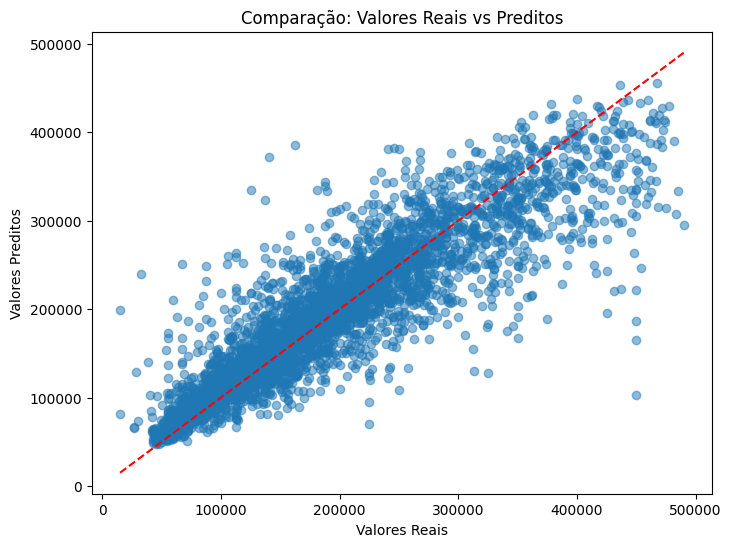

In [10]:
# comparação entre valores reais e previstos
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Valores Reais")
plt.ylabel("Valores Preditos")
plt.title("Comparação: Valores Reais vs Preditos")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()
